# Superstore Time Series Analysis

The goal of this exercise is to forecast future sales and profit for a superstore using company's sales data. The dataset can be found [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).

## Import Libraries and Dataset

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
xls = pd.ExcelFile('Sample - Superstore.xls')

In [4]:
df = pd.read_excel(xls, 'Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
print(df.columns)
print(df.shape)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
(9994, 21)


## Data Preprocessing

### Sales Data

In [49]:
sales = df[['Order Date', 'Sales']]
sales.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [50]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [51]:
sales.set_index('Order Date', inplace=True)

In [52]:
sales_monthly = sales['Sales'].resample('M').mean()

In [62]:
sales_weekly = sales['Sales'].resample('W-MON').mean()

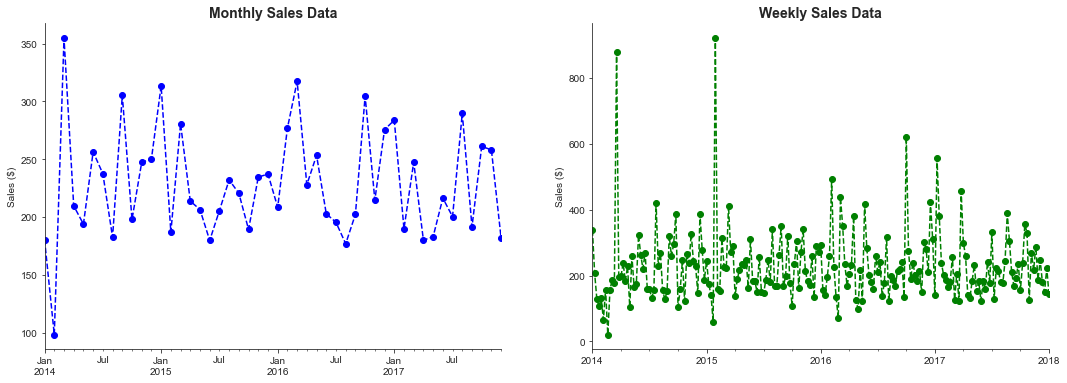

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sales_monthly.plot(marker='o', color='blue', style='--', ax=ax[0])
ax[0].set(ylabel='Sales ($)', xlabel='')
ax[0].set_title('Monthly Sales Data', fontweight='bold', fontsize=14)

sales_weekly.plot(marker='o', color='green', style='--', ax=ax[1])
ax[1].set(ylabel='Sales ($)', xlabel='')
ax[1].set_title('Weekly Sales Data', fontweight='bold', fontsize=14)
sns.despine()
plt.show()

### Profit Data

In [68]:
profit = df[['Order Date', 'Profit']]
profit.set_index('Order Date', inplace=True)

In [70]:
profit_monthly = profit.resample('M').mean()
profit_weekly = profit.resample('W-MON').mean()

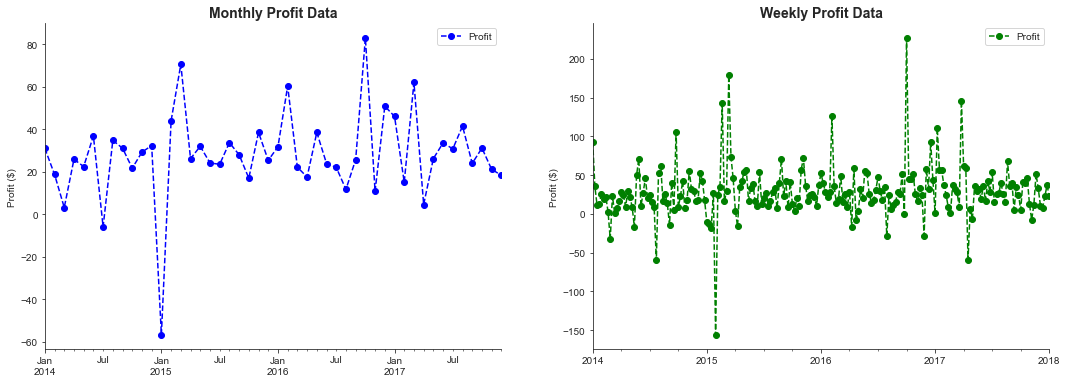

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

profit_monthly.plot(marker='o', color='blue', style='--', ax=ax[0])
ax[0].set(ylabel='Profit ($)', xlabel='')
ax[0].set_title('Monthly Profit Data', fontweight='bold', fontsize=14)

profit_weekly.plot(marker='o', color='green', style='--', ax=ax[1])
ax[1].set(ylabel='Profit ($)', xlabel='')
ax[1].set_title('Weekly Profit Data', fontweight='bold', fontsize=14)

sns.despine()
plt.show()

## Forecast Monthly Sales and Profit: Moving Average

In [100]:
sales = sales_monthly.values
window = 3
history_sales = [sales[i] for i in range(window)]
test_sales = [sales[i] for i in range(window, len(sales))]
predictions_sales = []

for t in range(len(test_sales)):
    length = len(history_sales)
    yhat = np.mean([history_sales[i] for i in range(length-window, length)])
    obs = test_sales[t]
    predictions_sales.append(yhat)
    history_sales.append(obs)

In [102]:
profit = profit_monthly.values
window = 3
history_profit = [profit[i] for i in range(window)]
test_profit = [profit[i] for i in range(window, len(profit))]
predictions_profit = []

for t in range(len(test_profit)):
    length = len(history_profit)
    yhat = np.mean([history_profit[i] for i in range(length-window, length)])
    obs = test_profit[t]
    predictions_profit.append(yhat)
    history_profit.append(obs)

In [103]:
from sklearn.metrics import mean_squared_error

error_sales = mean_squared_error(test_sales, predictions_sales)
error_profit = mean_squared_error(test_profit, predictions_profit)
print('Sales MSE: ', error_sales)
print('Profit MSE: ', error_profit)

Sales MSE:  2010.50779250156
Profit MSE:  573.1165255943607


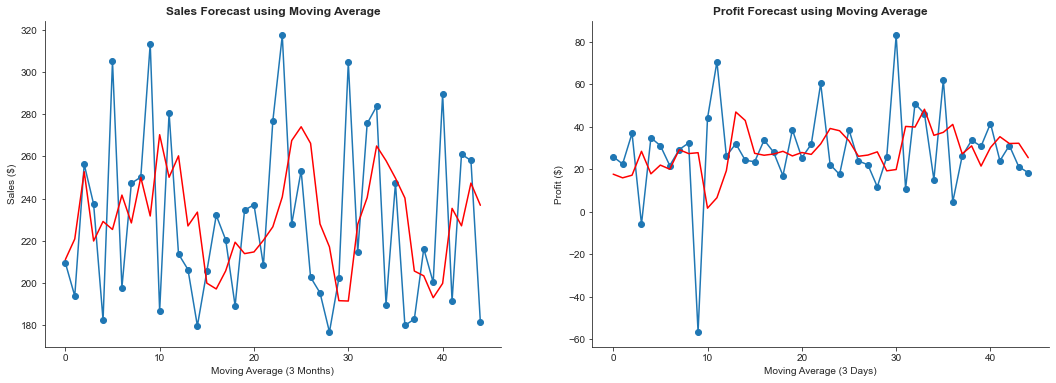

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

ax[0].plot(test_sales, marker='o')
ax[0].plot(predictions_sales, color='red')
ax[0].set(xlabel='Moving Average (3 Months)', ylabel='Sales ($)')
ax[0].set_title('Sales Forecast using Moving Average', fontweight='bold')

ax[1].plot(test_profit, marker='o')
ax[1].plot(predictions_profit, color='red')
ax[1].set(xlabel='Moving Average (3 Days)', ylabel='Profit ($)')
ax[1].set_title('Profit Forecast using Moving Average', fontweight='bold')

sns.despine()
plt.show()

## Forecast Monthly Sales and Profit: ARIMA Model

In [135]:
from statsmodels.tsa.stattools import adfuller

def adf(X):
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] > 0.05:
        return "Fail to reject null hypothesis. Data is non-stationary."
    elif result[1] <= 0.05:
        return "Reject null hypothesis. Data is stationary."


In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_ac(series):
    plot_acf(series, lags =20)
    plt.show()
    
def plot_pac(series):
    plot_pacf(series, lags=20)
    plt.show()

In [157]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model(df, order):
    series = df.copy()
    series.index = series.index.to_period('M')
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = []
    
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: ', rmse)
    
    plt.plot(test)
    plt.plot(predictions, color='red')
    sns.despine()
    plt.show()

### Monthly Sales

In [136]:
adf(sales_monthly)

ADF Statistic: -3.286567
p-value: 0.015490
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


'Reject null hypothesis. Data is stationary.'

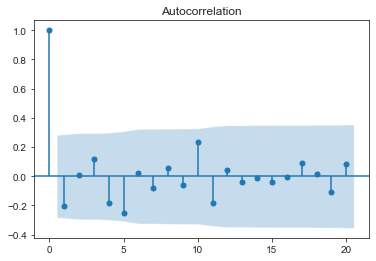

In [142]:
plot_ac(sales_monthly)

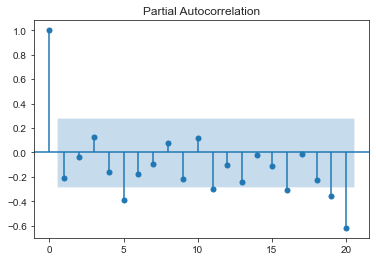

In [143]:
plot_pac(sales_monthly)

Test RMSE:  40.67848845490591


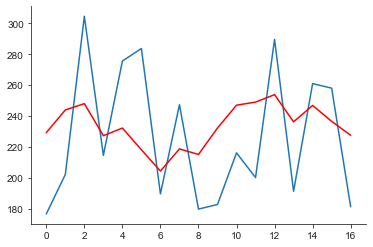

In [159]:
arima_model(sales_monthly, (1,0,1))

### Monthly Profit

In [151]:
adf(profit_monthly)

ADF Statistic: -6.330643
p-value: 0.000000
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602


'Reject null hypothesis. Data is stationary.'

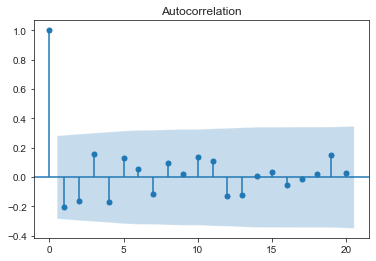

In [152]:
plot_ac(profit_monthly)

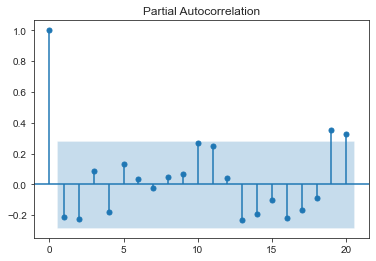

In [153]:
plot_pac(profit_monthly)

Test RMSE:  20.11933432732767


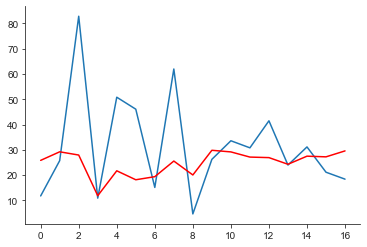

In [158]:
arima_model(profit_monthly, (1,0,1))

## FB Prophet

### Sales Data

In [160]:
from prophet import Prophet

In [162]:
sales_prophet = sales_monthly.copy().reset_index()
sales_prophet.columns = ['ds', 'y']

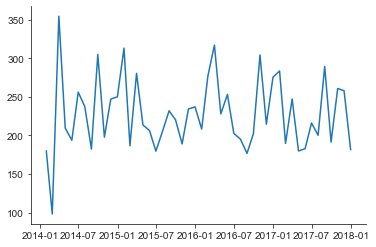

In [172]:
plt.plot(sales_prophet['ds'], sales_prophet['y'])
sns.despine()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


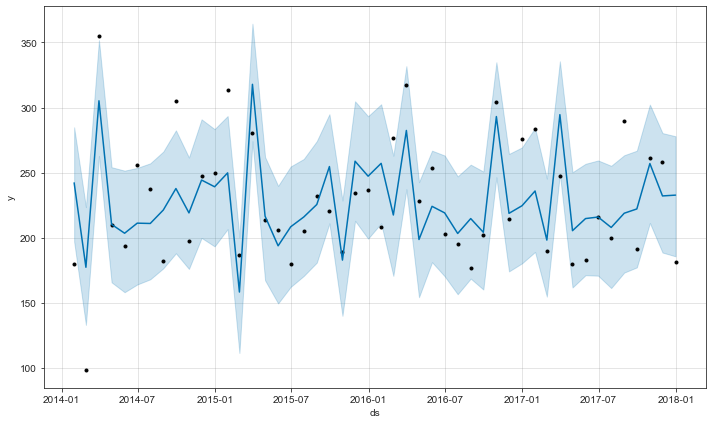

In [174]:
p = Prophet()

p.fit(sales_prophet)
future = p.make_future_dataframe(180)
forecast = p.predict()
p.plot(forecast)
plt.show()

### Profit Data

In [164]:
profit_prophet = profit_monthly.copy().reset_index()
profit_prophet.columns = ['ds', 'y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


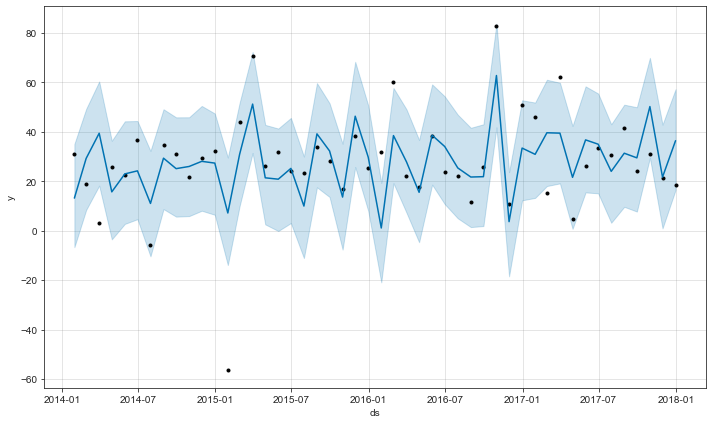

In [175]:
p = Prophet()

p.fit(profit_prophet)
future = p.make_future_dataframe(180)
forecast = p.predict()
p.plot(forecast)
plt.show()